In [326]:
# https://zhuanlan.zhihu.com/p/437747308

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


MODE = "sep"

base_dir = '../record/local/monax_monax_sep/monax-monax-3-separate'
file_list = os.listdir(base_dir)

file_list.sort()

flow = {}

data = {}

data["Time (s)"] = []
data["Throughput (Mbps)"] = []
data["Flow"] = []

new_data = {}

NAME_MAPPING = {
    "MONAX": "Monax",
    "VEGAS": "Vegas",
    "CUBIC": "Cubic",
    "PCC-ALLEGRO": "PCC Allegro",
    "PCC-VIVACE": "PCC Vivace",
    "BBR": "BBR"
}

flow_count = 0

for file in file_list:
    if('csv' in file):
        flow_count+=1
        flow_id = int(file.split('_')[1])
        CC = file.split('_')[2].upper()
        df = pd.read_csv(os.path.join(base_dir,file))
        time = df['time'].values
        delivery_rate = df['delivery_rate']
        
        if(flow_id == 0 and MODE == "sep" ):
            
            time = time[0:int(0.71*len(time))]
            delivery_rate = delivery_rate[0:int(0.71*len(delivery_rate))]
            
            min_time = min(time)
            time = time - min_time
        else:
            time = time - min_time
        time = np.append(time, time[-1]+1)
        delivery_rate = np.append(delivery_rate, 0)
        
        new_data["Flow "+str(flow_id+1)] = {}
        new_data["Flow "+str(flow_id+1)]["time"] = list(time)
        new_data["Flow "+str(flow_id+1)]["throughput"] = list(delivery_rate)
        
        data["Time (s)"]+=(list(time))
        data["Throughput (Mbps)"]+=(list(delivery_rate))
        data["Flow"]+=(list(["Flow "+str(flow_id+1)]*len(delivery_rate)))
        
        
        print(f"flow #{flow_id}: length = {len(delivery_rate)}")
        
        flow[flow_id] = delivery_rate
        
 

flow #0: length = 3959
flow #1: length = 2690
flow #2: length = 1592
flow #3: length = 518


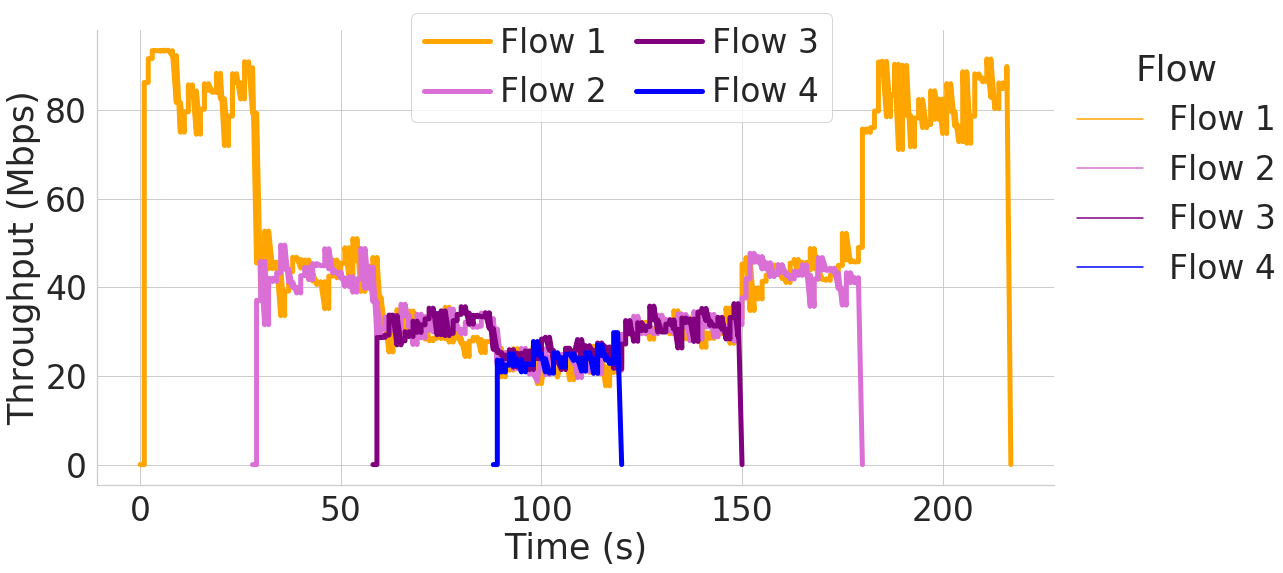

In [323]:
COLORS = ['orange', 'orchid', 'purple', 'blue', 'darksalmon']


# X_LIMIT = (0, 240)
# Y_LIMIT = (0, 100)

sns.set(font_scale=3)
sns.set_style("whitegrid")


g = sns.relplot(x="Time (s)", y="Throughput (Mbps)", hue="Flow", height=8, aspect=15/8,
                palette=COLORS[0:flow_count], linewidth = 5,
                estimator=None, 
                kind="line", data=data)

leg = g._legend
leg.set_bbox_to_anchor([1,0.7]) 

# handles = g._legend_data.values()
# labels = g._legend_data.keys()

leg = g.fig.legend(handles=handles, labels=labels, bbox_to_anchor = (0.65,1), columnspacing=0.9, handletextpad=0.3, ncol=2)
for line in leg.get_lines():
    line.set_linewidth(5)

    
# g.set(xlim=X_LIMIT,ylim=Y_LIMIT)
g.set_ylabels(fontsize=35)
g.set_xlabels(fontsize=35)

g.savefig("./fairness.png", dpi = 400)    

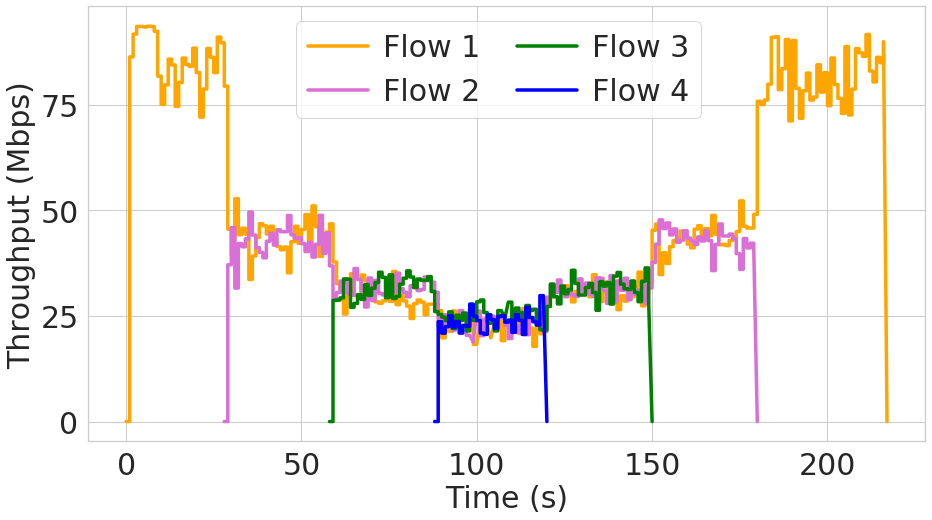

In [348]:
MARKER_SIZE = 11
LINE_WIDTH = 3.5


fig, axes = plt.subplots(1, 1, figsize=(15, 8))

x = list(range(1,17))


# 折线图
axes.plot(new_data["Flow 1"]["time"], new_data["Flow 1"]["throughput"], color='orange', label="Flow 1",  linewidth=LINE_WIDTH)
axes.plot(new_data["Flow 2"]["time"], new_data["Flow 2"]["throughput"], color='orchid', label="Flow 2", linewidth=LINE_WIDTH)
axes.plot(new_data["Flow 3"]["time"], new_data["Flow 3"]["throughput"], color='green', label="Flow 3", linewidth=LINE_WIDTH)
axes.plot(new_data["Flow 4"]["time"], new_data["Flow 4"]["throughput"], color='blue', label="Flow 4",  linewidth=LINE_WIDTH)

plt.legend(loc=1, fontsize=30, bbox_to_anchor = (0.75,1), title_fontsize=25, ncol=2, columnspacing=1.2, handletextpad=0.5)

axes.grid(which='minor', c='lightgrey')

#设置坐标标签标注和字体大小
plt.xlabel("Time (s)",fontsize=30)
plt.ylabel("Throughput (Mbps)",fontsize=30)

#设置坐标刻度字体大小
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.savefig("./fairness.png",bbox_inches = 'tight')
plt.show()